# Supervised Learning
### Benign and malignant cancer

In [2]:
import pandas as pd
from matplotlib import pyplot as plt

dataset = pd.read_csv("../data/Cancer_Data.csv")

if 'Unnamed: 32' in dataset.columns:
    dataset.drop('Unnamed: 32', axis=1, inplace=True)
dataset['diagnosis'].replace(['B', 'M'],[0, 1], inplace=True) # B = 0, M = 1 
dataset

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [3]:
from sklearn.model_selection import train_test_split

x = dataset.drop(['diagnosis','id'],axis=1)
y = dataset['diagnosis']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)



### Decision Tree

First, we will analyse the dataset with all information, and for that, we first need to create a decision tree.
Our first decision tree will be a default one, created by the scikit learn library.

In [4]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier() 
clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

Now, we send the decision tree our train sample.

In [5]:
clf.fit(x_train,y_train)

DecisionTreeClassifier()

To make the predictions we call the function:

In [6]:
predictions = clf.predict(x_test)

#### Accuracy

In [7]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

0.9239766081871345

#### Precision

In [8]:
from sklearn.metrics import precision_score
precision_score(y_test, predictions)

0.875

With this code, we can see the importance given to each feature of the dataset by the decision tree.

In [9]:
feature_importance_worst = pd.DataFrame(clf.feature_importances_, index = x_test.columns).sort_values(0, ascending=False)
feature_importance_worst.columns = ['%']
feature_importance_worst

,%
area_worst,0.710553
concave points_worst,0.151761
texture_mean,0.045017
concavity_worst,0.026576
area_se,0.019273
texture_worst,0.018359
symmetry_worst,0.010195
symmetry_mean,0.008415
radius_worst,0.007889
fractal_dimension_se,0.001962


In our dataset, we have 3 type of data:
 - worst: worst value recorded from that person
 - se: standard error
 - mean: mean a list of values

To see if we can improve our accuracy and precision, we are going to try to separate these 3 types and we will run it with the same decision tree to see if our results improve.<br>
We will also use the same lines as x_train and x_test so we can compare our results.

#### Dataset only with "Worst" values

In [10]:
x_worst_train = x_train.filter(['fractal_dimension_worst','symmetry_worst','concave points_worst','concavity_worst','compactness_worst','smoothness_worst','area_worst','perimeter_worst','texture_worst','radius_worst'])
x_worst_test = x_test.filter(['fractal_dimension_worst','symmetry_worst','concave points_worst','concavity_worst','compactness_worst','smoothness_worst','area_worst','perimeter_worst','texture_worst','radius_worst'])


clf.fit(x_worst_train,y_train)
predictions_worst = clf.predict(x_worst_test)
accuracy_score(y_test, predictions_worst)

0.9064327485380117

In [11]:
precision_score(y_test, predictions_worst)

0.8421052631578947

In [12]:
feature_importance_worst = pd.DataFrame(clf.feature_importances_, index = x_worst_test.columns).sort_values(0, ascending=False)
feature_importance_worst.columns = ['%']
feature_importance_worst

,%
area_worst,0.710553
concave points_worst,0.151617
concavity_worst,0.064796
texture_worst,0.025091
perimeter_worst,0.017531
fractal_dimension_worst,0.010195
compactness_worst,0.008766
radius_worst,0.008766
smoothness_worst,0.001424
symmetry_worst,0.001260


#### Dataset only with "Mean" values

In [13]:
x_mean_train = x_train.filter(['fractal_dimension_mean','symmetry_mean','concave points_mean','concavity_mean','compactness_mean','smoothness_mean','area_mean','perimeter_mean','texture_mean','radius_mean'])
x_mean_test = x_test.filter(['fractal_dimension_mean','symmetry_mean','concave points_mean','concavity_mean','compactness_mean','smoothness_mean','area_mean','perimeter_mean','texture_mean','radius_mean'])


clf.fit(x_mean_train,y_train)
predictions_mean = clf.predict(x_mean_test)
accuracy_score(y_test, predictions_mean)

0.9005847953216374

In [14]:
precision_score(y_test, predictions_mean)

0.8392857142857143

In [15]:
feature_importance_mean = pd.DataFrame(clf.feature_importances_, index = x_mean_test.columns).sort_values(0, ascending=False)
feature_importance_mean.columns = ['%']
feature_importance_mean

,%
concave points_mean,0.737083
area_mean,0.111425
texture_mean,0.068708
smoothness_mean,0.025038
fractal_dimension_mean,0.018032
compactness_mean,0.017952
perimeter_mean,0.011488
concavity_mean,0.010274
symmetry_mean,0.000000
radius_mean,0.000000


#### Dataset only with "SE" values

In [16]:
x_se_train = x_train.filter(['fractal_dimension_se','symmetry_se','concave points_se','concavity_se','compactness_se','smoothness_se','area_se','perimeter_se','texture_se','radius_se'])
x_se_test = x_test.filter(['fractal_dimension_se','symmetry_se','concave points_se','concavity_se','compactness_se','smoothness_se','area_se','perimeter_se','texture_se','radius_se'])


clf.fit(x_se_train,y_train)
predictions_se = clf.predict(x_se_test)
accuracy_score(y_test, predictions_se)

0.8245614035087719

In [17]:
precision_score(y_test, predictions_se)

0.7450980392156863

In [18]:
feature_importance_se = pd.DataFrame(clf.feature_importances_, index = x_se_test.columns).sort_values(0, ascending=False)
feature_importance_se.columns = ['%']
feature_importance_se

,%
area_se,0.627705
concavity_se,0.080890
texture_se,0.070437
fractal_dimension_se,0.045934
perimeter_se,0.044381
symmetry_se,0.034923
concave points_se,0.028197
smoothness_se,0.025929
radius_se,0.024074
compactness_se,0.017531


#### Dataset without "SE" values

Since the SE values got the worst results, we will try to use the all the dataset but without the SE values to see if the predictions are better

In [19]:
x_worstMean_train = x_train.drop(['fractal_dimension_se','symmetry_se','concave points_se','concavity_se','compactness_se','smoothness_se','area_se','perimeter_se','texture_se','radius_se'], axis=1)
x_worstMean_test = x_test.drop(['fractal_dimension_se','symmetry_se','concave points_se','concavity_se','compactness_se','smoothness_se','area_se','perimeter_se','texture_se','radius_se'], axis=1)

clf.fit(x_worstMean_train,y_train)
predictions_worstMean = clf.predict(x_worstMean_test)
accuracy_score(y_test, predictions_worstMean)

0.9415204678362573

In [20]:
precision_score(y_test, predictions_worstMean)

0.8688524590163934

In [21]:
feature_importance_worstMean = pd.DataFrame(clf.feature_importances_, index = x_worstMean_test.columns).sort_values(0, ascending=False)
feature_importance_worstMean.columns = ['%']
feature_importance_worstMean

,%
area_worst,0.721573
concave points_worst,0.149945
texture_mean,0.045017
concavity_worst,0.026576
symmetry_worst,0.018467
texture_worst,0.010482
concavity_mean,0.009861
radius_mean,0.008766
fractal_dimension_worst,0.007889
smoothness_worst,0.001424


We gathered 30 results from each dataset and calculated the mean of each one to see the differences.<br>
<br>

The average accuracy of each dataset was:
 - "Worst" Values: 0,93410
 - Without "SE" Values: 0,92577 
 - Normal Datase: 0,92027
 - "Mean" Values: 0,90863
 - "SE" Values: 0,87820

<br>

![Alt text](../images/decision_tree_accuracy.png)

<br>
In this graph we can see that the dataset with the "worst" columns has the best results in terms of accuracy but it's still very close to the dataset without the Standard Error (SE) columns and with the Normal dataset.
<br>


The same happened with the precision, being the dataset with the "Worst" values the best one.

 - "Worst" Values: 0,91085
 - Without "SE" Values: 0,90221
  - Normal Datase: 0,89370
 - "Mean" Values: 0,87820
 - "SE" Values: 0,76504

<br>

![Alt text](../images/decision_tree_precision.png)

<br>

The fact that the values are all very close might be explained by the fact that the Decision tree algorithm uses the greedy algorithm at each split finding a local optima, since "worst" values give the best results, all the datasets containing that values are going to be very similar. <br>
A way to improve decision trees is to avoid overfitting. This could be made by limiting maximum depth, pruning etc.
When we prune a tree we are correcting it after it has been fitted to the training dataset. It starts at the leaf nodes and removes those branches that do not affect the overall tree accuracy. It also lowers the complexity of the model.
<br>
In our code we can use sklearn to prune our trees using the ``ccp_alpha`` attribute inside the ``DecisionTreeClassifier`` function.


### Dataset with "worst" values using pruning

To prune a tree using sklearn we have to set the attribute `ccp_alpha` inside the `DecisionTreeClassifier` function but this value varies with each tree.<br>
A way to calculate the best alpha value for each tree is to get the different applicable alpha values. Then we just run the same decision tree with the different alpha values to get the accuracy.<br>
The code below shows the relation between alpha and accuracy.

Text(0, 0.5, 'Accuracy scores')

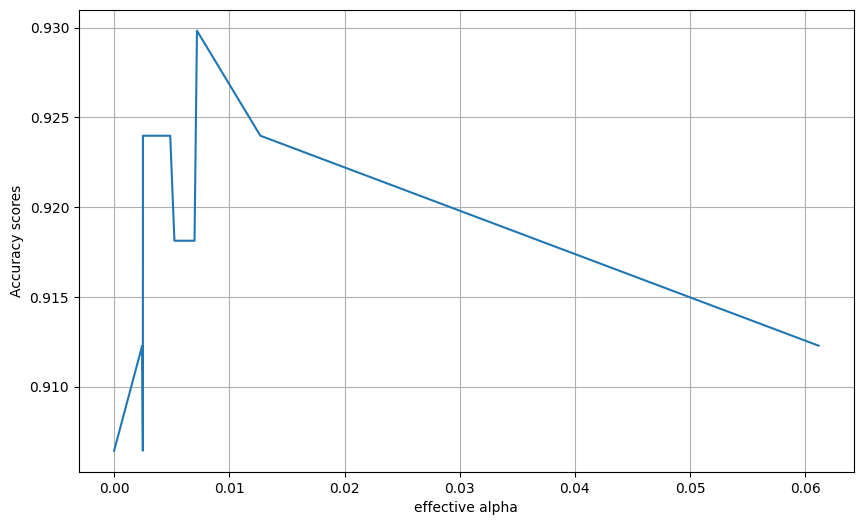

In [22]:
path = clf.cost_complexity_pruning_path(x_worst_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

clfs = []

for ccp_alpha in ccp_alphas:
    clf_worst = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf_worst.fit(x_worst_train, y_train)
    clfs.append(clf_worst)

acc_scores = [accuracy_score(y_test, clf_worst.predict(x_worst_test)) for clf_worst in clfs]

plt.figure(figsize=(10,  6))
plt.grid()
plt.plot(ccp_alphas[:-1], acc_scores[:-1])
plt.xlabel("effective alpha")
plt.ylabel("Accuracy scores")

In [24]:
from statistics import mean
accuracy_values = []

for i in range(100):
    x_alpha = x.filter(['fractal_dimension_worst','symmetry_worst','concave points_worst','concavity_worst','compactness_worst','smoothness_worst','area_worst','perimeter_worst','texture_worst','radius_worst'])

    x_alpha_train, x_alpha_test, y_alpha_train, y_alpha_test = train_test_split(x_alpha, y, test_size=0.3)
    
    clf_alpha = DecisionTreeClassifier() 

    path = clf_alpha.cost_complexity_pruning_path(x_alpha_train, y_alpha_train)
    ccp_alphas, impurities = path.ccp_alphas, path.impurities

    clfs = []

    for ccp_alpha in ccp_alphas:
        clf_alpha = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
        clf_alpha.fit(x_alpha_train, y_alpha_train)
        clfs.append(clf_alpha)

    acc_scores = [accuracy_score(y_alpha_test, clf_alpha.predict(x_alpha_test)) for clf_alpha in clfs]
    accuracy_values.append(max(acc_scores))

mean(accuracy_values)

    


0.9483625730994152